# Data Visualization

In this section, you will learn how to use Python to create your first data visualization. The phrase "a picture is worth a thousand words" comes to mind. Data visualization is a valuable tool for communicating a data-driven conclusion. In certain circumstances, the visualization is so persuasive that there is no need for further investigation.

Python's most powerful feature is probably exploratory data visualization. With a unique blend of flexibility and ease, one may go from idea to data to plot quickly. 

Excel may be easier than Python, but it lacks the flexibility of Python. Although D3.js is more powerful and flexible than Python, it takes substantially longer to create a plot.

There are many Python libraries that can do so:

* pandas
* matplotlib
* seaborn
* plotnine

We will work with the claims dataset from a Local Government Property Insurance Fund.

At its most basic level, insurance companies receive **premiums** in exchange for promises to compensate policyholders if an insured event occurs. The compensation provided by the insurer for incurred injury, loss, or damage that is covered by the policy.  A claim is another term for this compensation. The extent of the payout, known as the **claim severity**, is a significant financial expenditure for an insurance.

In terms of financial outlay, an insurer does not always concern if there are ten claims of THB10,000 or one claim of THB100,000. Insurers, on the other hand, frequently monitor how frequently claims occur, which is known as **claim frequency**.

One of the important tasks of insurance analysts is to develop models to represent and manage the two outcome variables, **frequency** and **severity**. In this chapter, we will learn how to 

In [1]:
import numpy as np
import pandas as pd

# Add this line so you can plot your charts into your Jupyter Notebook.
%matplotlib inline 

In [2]:
claims = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/claimsNewFormat.csv')

# New format dataframe
# url2 = 'https://raw.githubusercontent.com/pairote-sat/SCMA248/main/Data/claimsNewFormat.csv'
# claims = pd.read_csv(url2)

## Using pandas to plot line, bar charts and Histogram in Python

To give you an example, the property fund had 1,110 policyholders in 2010 who had a total of 1,377 claims. 

First we will create a table reporting the **2010 claims frequency distribution**.

**Note:** In a dataset, a histogram displays the amount of occurrences of certain values. It looks a lot like a bar chart at first glance.

First we will explore how to make a line chart and a bar chart that indicate the frequency of different values in the data set before plotting the histogram. As a result, you will be able to compare the various ways.

Of course, if you have never plotted anything in Pandas before, it is a good idea to start with a simple line chart.

Simply type the `plot` method after the pandas data frame you wish to visualize to put your data on a chart. By default `plot` provides a line chart.

If you plot the `Freq` column of the claims2010 data frame as is, you will get the following results.

In [3]:
claims2010 = claims[(claims['Year']==2010)]

In [4]:
claims2010['Freq'].head()

4     1
9     1
14    1
19    0
24    1
Name: Freq, dtype: int64

<AxesSubplot:>

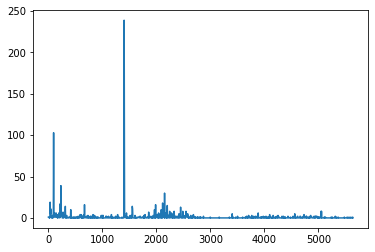

In [5]:
claims2010['Freq'].plot()

We will have to work with the original dataset a little further to accomplish what we want (plot the occurrence of each unique value in the dataset). Let uss combine a `.groupby()` aggregate function with a `.count()` aggregate function. 

In [6]:
FreqDist = claims2010.groupby('Freq').count()[['PolicyNum']]

FreqDist.head()

,PolicyNum
Freq,
0,707
1,209
2,86
3,40
4,18


If you plot the output of this, you’ll get a much nicer line chart.

<AxesSubplot:xlabel='Freq'>

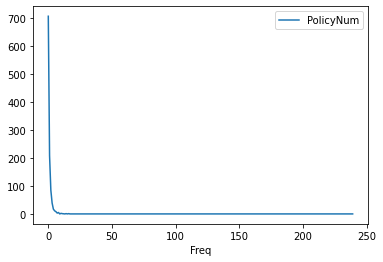

In [7]:
FreqDist.plot()

To turn your line chart into a bar chart, just add the bar keyword. Here we simply count the unique values in the dataset and put that on a bar chart

<AxesSubplot:xlabel='Freq'>

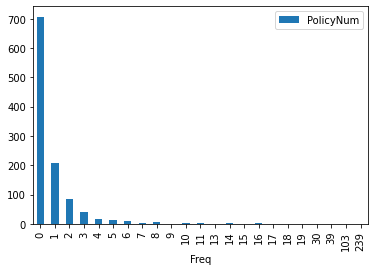

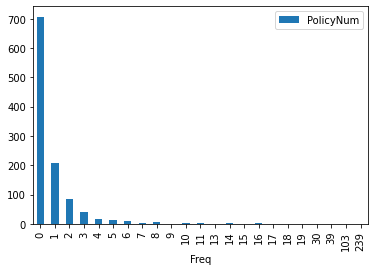

In [8]:
FreqDist.plot(kind='bar')

FreqDist.plot.bar()

However, there is one more step before plotting a histogram: these unique values will be clustered into ranges. Bins or buckets are the names for these ranges, and the default number of bins in Python is 10. As a result of the grouping, your histogram should now look like this:

We will use the `hist` function that is built into pandas. It is very simple to turn your pandas data frame into a histogram once you have the values in it.

The `hist` function automatically does several of the useful tasks:

1. It does the grouping.

2. It does the counting. 

3. It plots a histogram for each column in your data frame that has numerical values in it.

**Note:** You can change the number of bins/buckets from the default of 10 by setting a parameter, for example `bins=20`.

array([[<AxesSubplot:title={'center':'Freq'}>]], dtype=object)

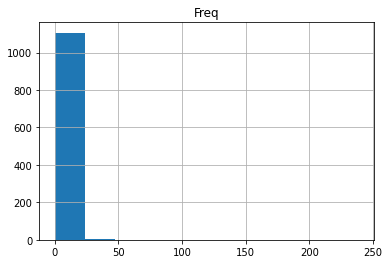

In [9]:
claims2010[['Freq']].hist()

**Note** one of an important tasks is to find a model (perhaps a statistical distribution) that adequately fits this claim frequency distribution)  

array([[<AxesSubplot:title={'center':'Freq'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

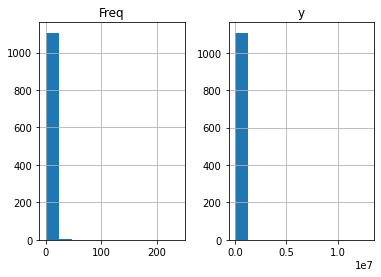

In [10]:
claims2010[['Freq','y']].hist()

Next we will focus on claim severity. 

A common method for determining the severity distribution is to look at the distribution of the sample of 1,377 claims. Another common approach is to look at **the distribution of average claims among policyholders who have made claims**. There were 403 (=1110-707) such policyholders in our 2010 sample.

**Exercise** 

1. Create a table that summarizes the sample distribution of average severities from the 403 policyholders who made a claim.

2. Use `hist` to plot the distribution of positive average severities. What conclusion can we draw from the plot?

3. Plot the distribution of positive average severities in logarithmic units 

array([[<AxesSubplot:title={'center':'yAvg'}>]], dtype=object)

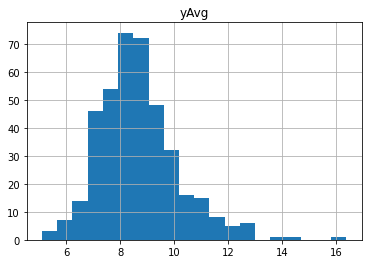

In [11]:
claims2010 = claims[(claims['Year']==2010) &  (claims['Freq'] >= 1)]
output = claims2010[['yAvg']]

output.apply(np.log).hist(bins=20)
#claims2010['lnyAvg'] = claims2010['yAvg'].apply(np.log)
#claims2010['lnyAvg'] = np.log(claims2010['yAvg'])

**Note** Examples of various plots from the widely-used packages can be seen on the following links. The pages provide access to the entire picture and source code for any image.

* matplotlib https://matplotlib.org/stable/gallery/index.html

* seaborn
https://seaborn.pydata.org/examples/index.html


## Plot a Histogram in Python using Matplotlib

To plot a histogram in Python using Matplotlib, use the following command:

Text(0.5, 1.0, 'Distribution of Positive Average Severities')

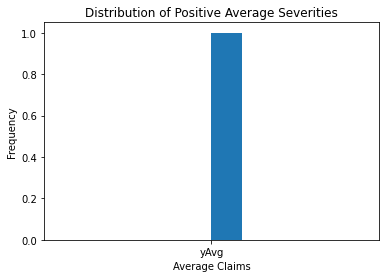

In [12]:
claims2010 = claims[(claims['Year']==2010) &  (claims['Freq'] >= 1)]
output = claims2010[['yAvg']]

import matplotlib.pyplot as plt
plt.hist(output, bins = 10)
plt.xlabel('Average Claims')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Average Severities')

The image above shows more information about the sample claim distribution, revealing a distribution that is dominated by this single large claim, making the histogram useless. 

Even when the large claim is removed, the distribution remains skewed to the right. Working with claims in logarithmic units, especially for graphical reasons, is a widely acknowledged practice.

The following figure in the right-hand panel is considerably easier to read.

Text(0.5, 1.0, 'Distribution of Positive Average Severities')

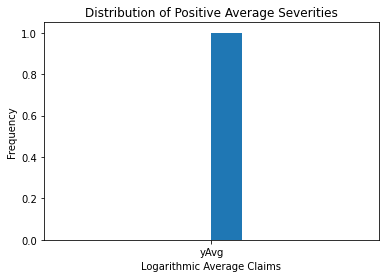

In [13]:
plt.hist(np.log(output), bins = 10)
plt.xlabel('Logarithmic Average Claims')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Average Severities')

## Using ggplot and Python to Create Your First Plot

You will learn how to construct data visualizations using **ggplot** in Python using a **grammar of graphics**. A grammar of graphics is a high-level tool for creating data displays in a consistent and efficient manner. It abstracts the majority of low-level details, **allowing you to concentrate on producing useful and beautiful data visualizations**.

A graphics grammar is provided by a number of Python libraries. We focus on **plotnine** since it is the most developed. 

Plotnine is based on the R programming language's **ggplot2**, thus if you are familiar with R, you may think of plotnine as the Python counterpart of ggplot2.

The first example of plotnine being used to plot the distribution of positive average severities is seen below.

In [14]:
# We add the logarithms of claim average into the claims dataset. 

claims['lnyAvg'] = np.log(claims[claims['Freq']>=1]['yAvg'])

In [15]:
claims2010 = claims[(claims['Year']==2010) &  (claims['Freq'] >= 1)]

In [16]:
from plotnine import *

(
    ggplot(claims2010)  # What data to use
    + aes(x='lnyAvg')  # What variable to use
    + geom_histogram(bins = 20)  # Geometric object to use for drawing
)

ModuleNotFoundError: No module named 'plotnine'

### Building Your First Plot With ggplot and Python

You will learn how to use ggplot in Python to create your first data visualization.

The approach of making visuals with ggplot2 is intuitively based on **The Grammar of Graphics** (where the gg comes from).

This is comparable to how understanding grammar can help a beginner build hundreds of distinct sentences without having to memorize each one.

We will be able to make hundreds of different plots using ggplot2 by combining three basic components:

* **a data set**, 

* **geoms** are visual marks that represent data points. There are several geometries including 

  + scatterplot, 
  
  + barplot, 
  
  + histogram, 
  
  + smooth densities, 
  
  + qqplot, and 
  
  + boxplot.

* **aesthetic mapping**  describe how properties of the data (variables) connect with features of the graph, such as distance along an axis, size, or colour.


Visit the following website for additional information on plotnine and gallery:

https://plotnine.readthedocs.io/en/stable/

The claims dataset is plotted in this short code sample. Here's a brief breakdown of what's going on:

* Line 1: You use ggplot() to build a plot object and feed the claims data frame to the constructor.

* Line 2: The variable to utilize for each axis, in this case **lnyAvg**, is set with aes().

* Line 3: You use the geom_histogram() function to tell the chart to draw as a histogram.

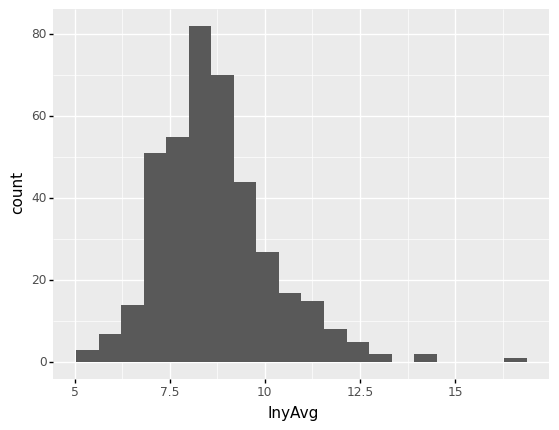

<ggplot: (311511861)>

In [17]:
(
    ggplot(claims2010)  # What data to use
    + aes(x='lnyAvg')  # What variable to use
    + geom_histogram(bins = 20)  # Geometric object to use 
)

You'll also learn about the following optional components:

1. **Statistical transformations** define computations and aggregations to be made to it before plotting data.

2. During the mapping from data to aesthetics, **scales** do some transformation. A logarithmic scale, for example, can be used to better represent specific elements of your data.

3. **Facets** let you divide data into groups depending on specific qualities, then plot each group in its own panel within the same visual.

4. The position of items is mapped to a 2D graphical place in the plot using **coordinate systems**. For example, if it makes more sense in the graphic you're creating, you can choose to reverse the vertical and horizontal axes.

5. **Themes** can be used to modify colors, fonts, and shapes are just a few of the visual aspects 

Do not worry if you are not sure what each component means right now. Throughout this chapter, you will learn more about them.


#### Geometries

In plotnine we create graphs by adding layers. Layers can define geometries, compute summary statistics, define what scales to use, or even change styles. 

To add layers, we use the symbol `+`. In general, a line of code will look like this:

`ggplot(data) + LAYER 1 + LAYER 2 + ... + LAYER N`

Usually, the first added layer defines the geometry. For a scatterplot, the function used to create plots with
this geometry is `geom_point`. 

For `geom_point` to run properly we need to provide data and a mapping. 

The figure below shows a scatter plot (relationship) between the coverage and the total claims.

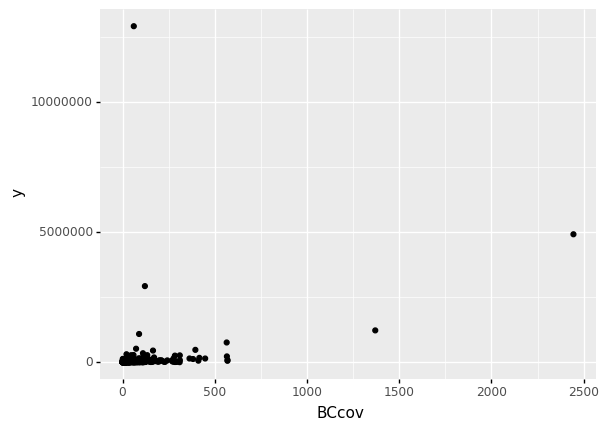

<ggplot: (311808725)>

In [18]:
claims = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/claimsNewFormat.csv')

# Here we express the coverage of building and contents in millions of dollars
claims['BCcov'] = claims['BCcov']/(10**6)
claims2010 = claims[(claims['Year']==2010) &  (claims['Freq'] >= 1)]

(
    ggplot(data = claims2010)  # What data to use
    + geom_point(aes(x = 'BCcov',y = 'y'))  # Geometric object to use for drawing
)

#### Aesthetic mappings

The next step is to decide which variable you'll use for each axis in your graph. You must tell plotnine which variables you want to include in the visual because each row in a data frame can have several fields.

Data variables are mapped to graphical features such as 2D position and color by aesthetics. 

In other words, aesthetic mappings describe how properties of the data (variables) connect with features of the graph, such as distance along an axis, size, or colour. 

The `aes` function connects data with what we see on the graph by defining aesthetic mappings.

The code, for example, creates a graph with **BCcov** (coverages (in millions)) on the x-axis and **claims** on the y-axis:

#### Adding more arguments
A second layer in the plot we wish to make involves adding a label to each point to identify the entity type. 

The `geom_label` and `geom_text` functions permit us to add text to the plot **with** and **without** a rectangle behind the text, respectively.

Because each point (each claim in this case) has a label (type of local government entities), we need an aesthetic mapping to make the connection between points and labels. 

By reading the help file, we learn that we supply the mapping between point and label through the label argument of `aes`. So the code looks like this:


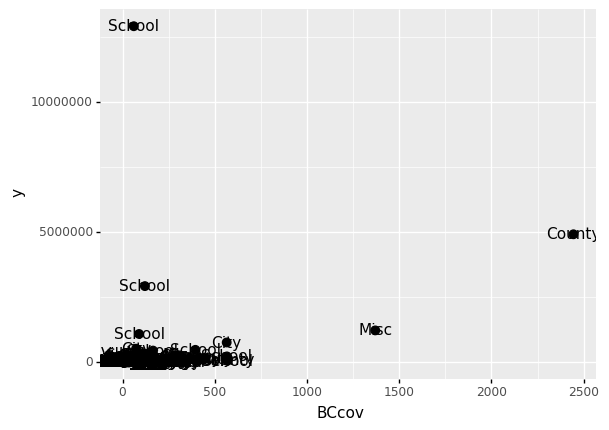

<ggplot: (303583217)>

In [19]:
(
    ggplot(data = claims2010)  # What data to use
    + geom_point(aes(x = 'BCcov',y = 'y'), size = 3)  # Geometric object to use for drawing
    + geom_text(aes(x = 'BCcov', y = 'y', label = 'Type'))
)

`size` is not a mapping: whereas mappings use data from specific observations and need to be inside `aes()`, operations we want to affect all the points the same way do not need to be included inside `aes`.

If we read the help file for `geom_text`, we see the `nudge_x` argument, which moves the text slightly to the right or to the left:

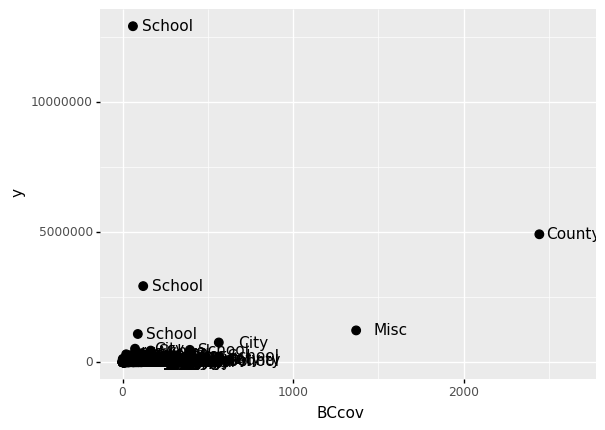

<ggplot: (303610161)>

In [20]:
(
    ggplot(data = claims2010)  # What data to use
    + geom_point(aes(x = 'BCcov',y = 'y'), size = 3)  # Geometric object to use for drawing
    + geom_text(aes(x = 'BCcov', y = 'y', label = 'Type'), nudge_x = 200)
)

## Global and local aesthetic mappings

In the previous line of code, we define the mapping `aes(x = 'BCcov', y = 'y')` twice, once in each geometry. 

We can avoid this by using a global aesthetic mapping. 

We can do this when we define the blank slate ggplot object. 

If we define a mapping in ggplot, all the geometries that are added as layers will default to this mapping. 
We redefine p:

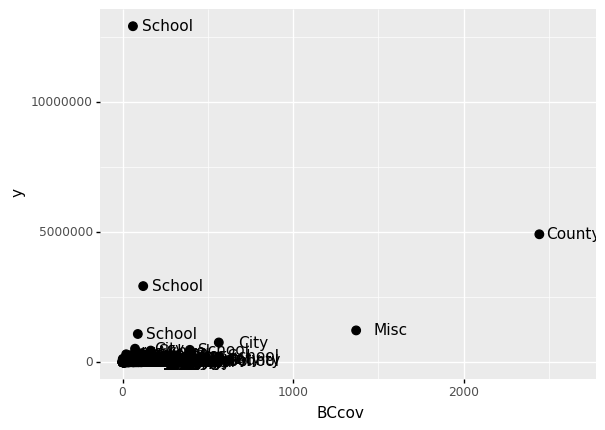

<ggplot: (312462793)>

In [21]:
p = ggplot(data = claims2010) + aes(x = 'BCcov', y = 'y', label = 'Type')

(
    p 
    + geom_point(size = 3) 
    + geom_text(nudge_x = 200)
)

In the code above, we keep the `size` and `nudge_x` arguments in `geom_point` and `geom_text`, respectively, because we want to only increase the size of points and only nudge the labels. 

If we put those arguments in `aes` then they would apply to both plots. 
Also note that the `geom_point` function does not need a label argument and therefore ignores that aesthetic. 

If necessary, we can override the global mapping by defining a new mapping within each layer. These local definitions override the global. 

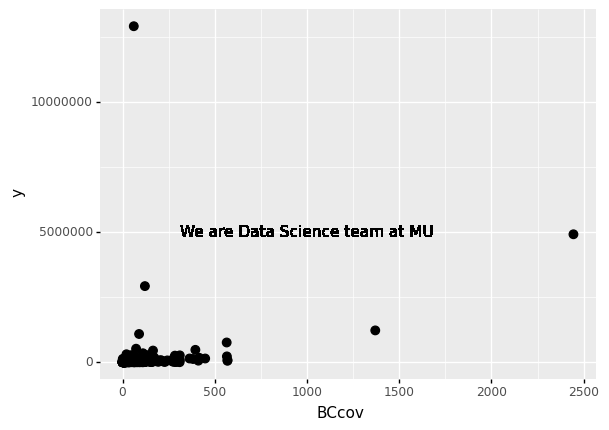

<ggplot: (312850877)>

In [22]:
p = ggplot(data = claims2010) + aes(x = 'BCcov', y = 'y', label = 'Type')

(
    p 
    + geom_point(size = 3) 
    + geom_text(aes(x=1000, y = 5000000), label = 'We are Data Science team at MU')
)

#### Scales

First, our desired scale in claims is in log-scale. This is not the default, so this change needs to be added through a scales layer. 

A quick look at the cheat sheet reveals the `scale_y_continuous` function lets us control the behavior of scale. We use it like this:

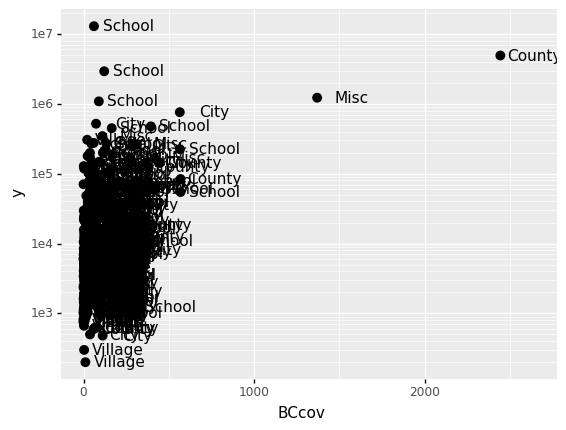

<ggplot: (300296569)>

In [23]:
p = ggplot(data = claims2010) + aes(x = 'BCcov', y = 'y', label = 'Type')

(
    p 
    + geom_point(size = 3) 
    + geom_text(nudge_x = 200)
    + scale_y_continuous(trans = "log10")
)

Alternative to the `scale_y_continuous`, we can use the function `scale_y_log10`, which we can use to rewrite the code like this:  

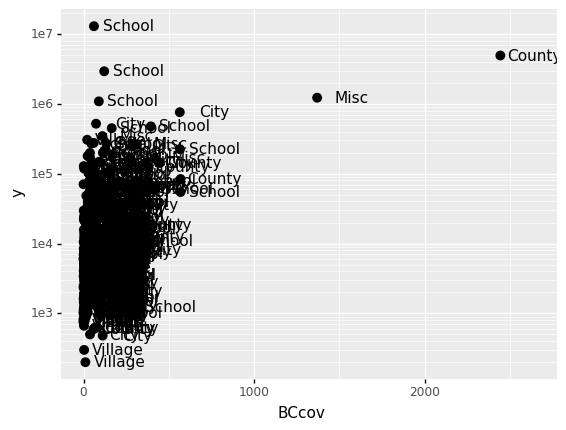

<ggplot: (313462709)>

In [24]:
(
    p 
    + geom_point(size = 3) 
    + geom_text(nudge_x = 200)
    + scale_y_log10()
)

## Labels and titles

Similarly, the cheat sheet quickly reveals that to change labels and add a title, we use the following functions:

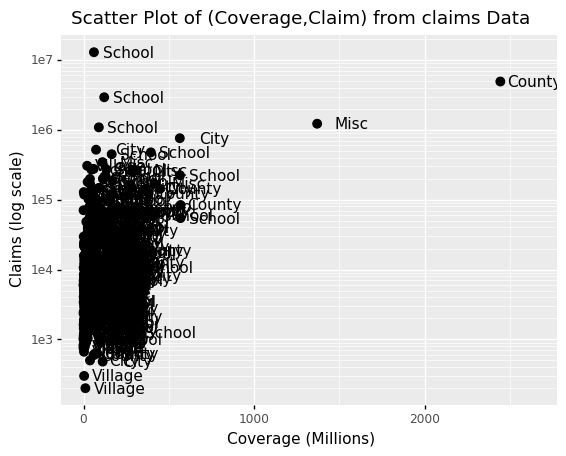

<ggplot: (313816497)>

In [25]:
(
    p 
    + geom_point(size = 3) 
    + geom_text(nudge_x = 200)
    + scale_y_log10()
    + xlab("Coverage (Millions)") 
    + ylab("Claims (log scale)") 
    + ggtitle("Scatter Plot of (Coverage,Claim) from claims Data")
)

## Categories as colors

We can change the color of the points using the `colour` argument in the `geom_point` function. 

To facilitate demonstration of new features, we will redefine `p` to be everything except the points layer:

In [26]:
p = ggplot(data = claims2010) + aes(x = 'BCcov', y = 'y', label = 'Type') + geom_point(size = 3)  + geom_text(nudge_x = 200) + scale_y_log10() + xlab("Coverage (Millions)")  + ylab("Claims (log scale)")  + ggtitle("Scatter Plot of (Coverage,Claim) from claims Data")

and then test out what happens by adding different calls to `geom_point`. We can make all the points blue by adding the color argument:

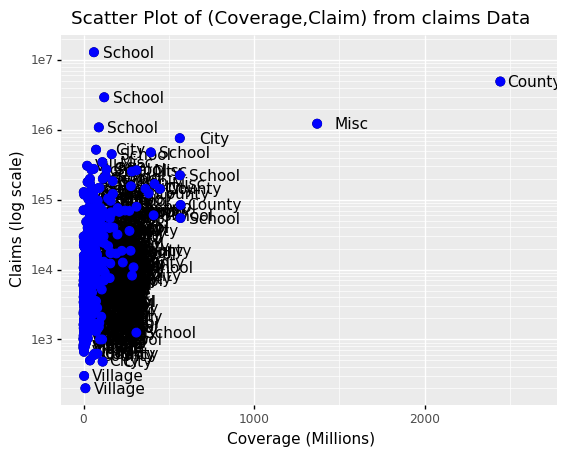

<ggplot: (300294321)>

In [27]:
(p + geom_point(size = 3, colour ="blue"))


This, of course, is not what we want. We want to assign color depending on the entity type. 

A nice default behavior of ggplot2 is that if we assign a **categorical** variable to colour, it automatically assigns a different color to each category and also adds a legend.

Since the choice of colour is determined by a feature of each observation, this is an aesthetic mapping. 

To map each point to a color, we need to use `aes`. We use the following code:

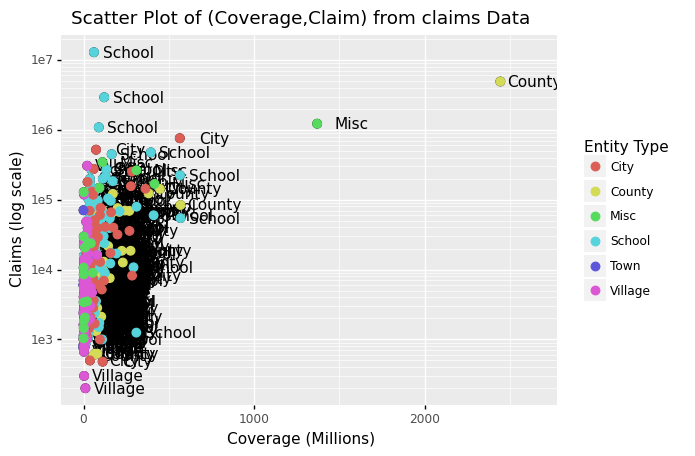

<ggplot: (312026033)>

In [28]:
(p + geom_point(aes(colour='Type'), size = 3)  + scale_color_discrete(name = "Entity Type"))

**Comment:** The above data visualization should provide insight into the relationship between claims and Coverage, and also claims and entity type.

## Data visualization in practice


In this section, we will show how to use plotnine (ggplot2) to make plots that are both informative and visually appealing. We will use plots to help us better comprehend global health and economic patterns as motivation. 

We will put what we learned in this chapter into practice and learn how to improve the plots by augmenting the code. We will go through general data visualization principles and ideas like faceting, time series plots, transformations, and ridge plots as we go through our case study.


Here is an example that uses an abstract from the Gapminder dataset, which became popular after **Hans Rosling's Ted Talk**. For more than 100 countries, it provides average life expectancy, GDP per capita, and population size.

In addition, according to the research result **Socioeconomic development and life expectancy relationship: evidence from the EU accession candidate countries** by Goran Miladinov in Journal of Population Sciences, Genus volume 76, Article number: 2 (2020), the results show that 

* a country's population health and socioeconomic development have a significant impact on life expectancy at birth; 

* in other words, as a country's population health and socioeconomic development improves, infant mortality rates decrease, and life expectancy at birth appears to rise. 

* Through increased economic growth and development in a country, **GDP per capita raises life expectancy at birth, resulting in a longer lifespan**.

https://genus.springeropen.com/articles/10.1186/s41118-019-0071-0#:~:text=GDP%20per%20capita%20increases%20the,to%20the%20prolongation%20of%20longevity.)

#### Visualization with bubble plot

The link between world countries' life expectancy (y) and GDP per capita (x) is depicted by a bubble plot below. Each country's population is indicated by the size of its circles.

A **bubble plot** is a scatterplot with a third dimension: the size of the dots represents the value of an additional numeric variable. (source: data-to-viz).

As input, you will need three numerical variables: one for the X axis, one for the Y axis, and one for the dot size.

In [29]:
gapminder = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/gapminder_full.csv')

#url = 'https://raw.githubusercontent.com/STLinde/Anvendt-Statistik/main/gapminder_full.csv'
#gapminder = pd.read_csv(url)
#gapminder['year'].unique()

**Note**: The gapminder data frames include six variables:

| Variable | Meaning                  |
|----------|--------------------------|
| country  |                          |
| continent|                          |
| year     |                          |
| life_exp | life expectancy at birth |
|population | total population        |
|gdp_cap   | per-capita GDP           |

The per-capita GDP is expressed in international dollars, which are "a hypothetical unit of money with the same purchasing power parity as the United States dollar at a specific point in time".

As the dataset covers the period between 1952 and 2007, we start by looking at 1957 about 50 years ago.

In [30]:
beginning_year = 1957
latest_year = gapminder['year'].max()

gapminder1957 = gapminder[gapminder['year']==beginning_year]
gapminder2007 = gapminder[gapminder['year']==latest_year]

The following Python code creates the most basic bubble chart using ggplot.

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


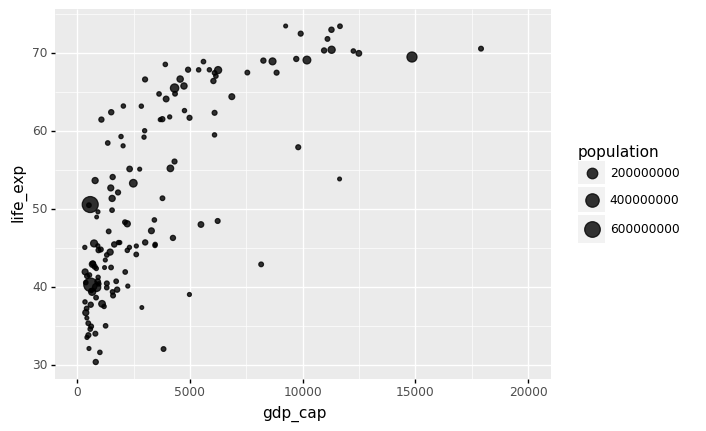

<ggplot: (312446985)>

In [31]:
# With plotnine (ggplot2)

from plotnine import *

gapminder1957

p = ggplot(data = gapminder1957) + \
    aes(x = 'gdp_cap', y = 'life_exp', size = 'population') + \
    geom_point(alpha = 0.8)

(
p + xlim(0,20000)
)

The bubble size is the first thing we need to modify in the preceding chart. Using the range input, `scale_size()` allows you to change the size of the smallest and largest circles. It's worth noting that you can change the legend's name with your own.

It is worth noting that circles frequently overlap. You must first sort your dataset, as shown in the code below, to avoid having large circles on top of the chart.

**Note:** Here we use `xlim()` to specify the left/lower limit and the right/upper limit of the scale.

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


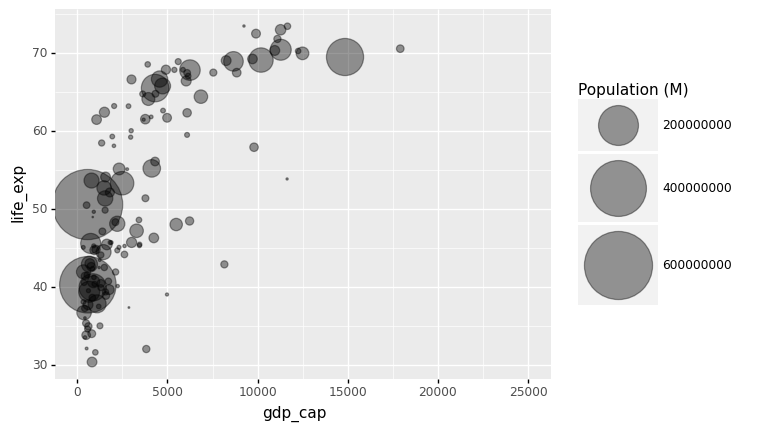

<ggplot: (314251261)>

In [32]:
data_sorted = gapminder1957.sort_values(by = ['population'], ascending = False)

p = ggplot(data = data_sorted) + aes(x = 'gdp_cap', y = 'life_exp', size = 'population') + geom_point(alpha = 0.4)

(
p + xlim(0,25000) + scale_size(range = (.1,28), name='Population (M)')
)

Most points fall into **two distinct categories**:
1. Life expectancy around 70 years and GDP per capita  more than 5000.
2. Life expectancy lower than 55 years and GDP per capita lower than 2500.

We can utilize color to signify continent to check that these countries are really from the regions we expect.

Each country's continent is applied to control circle color in this example by adding `color='continent'`:

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


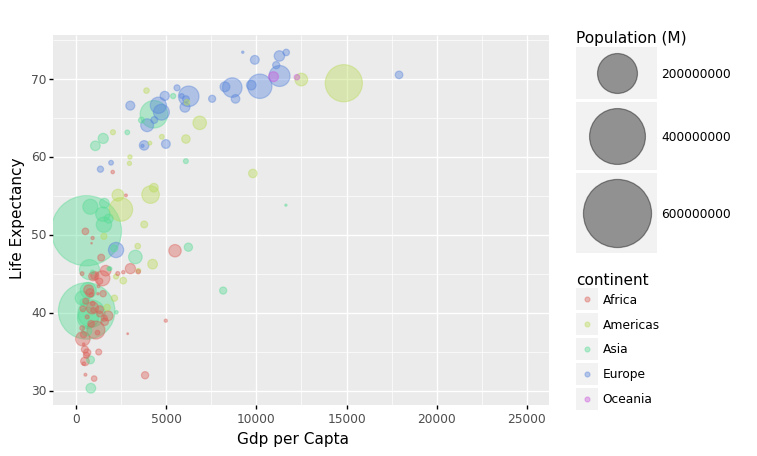

<ggplot: (314401913)>

In [33]:
data_sorted = gapminder1957.sort_values(by = ['population'], ascending = False)

p = ggplot(data = data_sorted) + aes(x = 'gdp_cap', y = 'life_exp', size = 'population', color='continent') + geom_point(alpha = 0.4)

(
p + xlim(0,25000) + 
    scale_size(range = (.1,28), name='Population (M)') + 
    xlab('Gdp per Capta') +
    ylab('Life Expectancy') 
)

We may compare the results between 1957 and 2007 to see whether there is an improvement in life expectancy with GDP per capita. 

To do this, we can simply repeat the whole process as above by replacing the data in 1957 with 2007.

Alternatively, we can use Pandas `pipe` function.

#### Pandas Pipe

We will briefly introduce the concept of **pipes (or method chaining)** in Python that allows us to make code more efficient and improve code readability.

**Background** In Data Processing, it is common to construct a function to perform operations (such as statistical calculations, splitting, or substituting values) on a certain row or column in order to get new data.

(source: https://towardsdatascience.com/using-pandas-pipe-function-to-improve-code-readability-96d66abfaf8)

For a typical code example below, we might save a result of a function in a variale, for example `res1`, and then pass it into the next function, `g`. As a result, you will have a lot of variables with potentially meaningless names, which will add to the complexity of your code.

```
# f(), g() and h() are user-defined function 
# df is a Pandas DataFrame
res1 = h(df)
res2 = g(res1, arg1=1)
res3 = f(res2, arg2=b, arg3=c)
```


Alternative to the this approach, we can nest function calls as follows:
```
# f(), g() and h() are user-defined function 
# df is a Pandas DataFrame
f(g(h(df), arg1=a), arg2=b, arg3=c)
```

Pipes will enable us to build code that offers the following advantages:

* arranging data operations in a left-to-right order (as opposed to from the inside and out),

* avoiding calls to nested functions

* reducing the number of local variables and function definitions required, and

* making it simple to add steps to the sequence of operations at any point.

For a better understanding how the piped code works the interpreted version is shown below:
We can write with pipe as follows:

```
(
    df.pipe(h)
    .pipe(g, arg1=a)
    .pipe(f, arg2=b, arg3=c) 
)
```
To make the code the way we want it, we'll use () brackets around it.

We also see that a pipe passes the results of one method (function) to another method (function):

* `df.pipe(h)` is the same as `h(df)`, which is then used as the input for another method, the method `g` in this case.

* `df.pipe(h).pipe(g, arg1=a)` results in `g(h(df), arg1=a)`. It is then passed to the function `f`.

* `df.pipe(h).pipe(g, arg1=a).pipe(f, arg2=b, arg3=c)` then produces the same final result as `f(g(h(df), arg1=a), arg2=b, arg3=c)`. 

When applying numerous methods to a Python iterable, pipe makes code look clearer.


#### Applying Pandas pipes to gapminder

We will apply the concept of Pandas pipes to gapminder dataset. In the data visualization process above, we proceed in the following manner:

1. We select rows (observations) from year 1957 in the Gapminder dataset.

2. The result filtered data frame is used as the data for the `ggplot` function to produce the bubble plt.

Therefore, to apply pipes for this example, we first define a Python function (see the preceding code) that returns the subset of the data frame filtered by selecting rows with a specified year.

To select rows with the year 2007, we previously used the following code `gapminder[gapminder['year']==latest_year]`.

Using pipe together with our user-defined function `year_filter` produces the same results 
`year_filter(gapminder, latest_year)`, which will selects rows with observations in 2007.

**Note** The function `year_filter` is defined for illustrative purposes. Aalternatively, we can directly apply the pandas `query` method to select the specific observations (or rows). Details are given below.

In [34]:
def year_filter(df,year_selected):
    cond=df['year']==year_selected
    return df.loc[cond,]

In [35]:
gapminder.pipe(year_filter,latest_year)

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
1679,"Yemen, Rep.",2007,22211743,Asia,62.698,2280.769906
1691,Zambia,2007,11746035,Africa,42.384,1271.211593


In [36]:
year_filter(gapminder, latest_year)

,country,year,population,continent,life_exp,gdp_cap
11,Afghanistan,2007,31889923,Asia,43.828,974.580338
23,Albania,2007,3600523,Europe,76.423,5937.029526
35,Algeria,2007,33333216,Africa,72.301,6223.367465
47,Angola,2007,12420476,Africa,42.731,4797.231267
59,Argentina,2007,40301927,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332,Asia,73.422,3025.349798
1679,"Yemen, Rep.",2007,22211743,Asia,62.698,2280.769906
1691,Zambia,2007,11746035,Africa,42.384,1271.211593


Now we will proceed to our next step to use the current filtered data frame to create a bubble plot with ggplot. The following command with pipe completes our task:

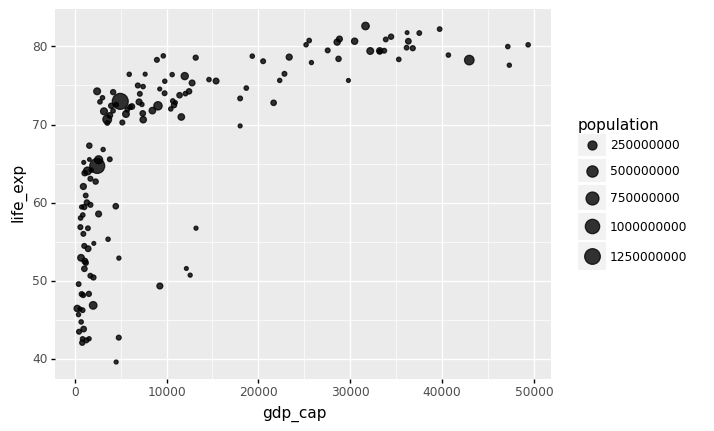

<ggplot: (314400861)>

In [37]:
p = gapminder.pipe(year_filter,2007).pipe(ggplot) 

( p +
  aes(x = 'gdp_cap', y = 'life_exp', size = 'population') + geom_point(alpha = 0.8)
)

Please also note that we can also use pandas `query` method to filter or subset this data frame. Filtering conditions can be applied as a string using the query function. You can reference variables using @ (see example below). The `query` gives you more options than many other approaches.

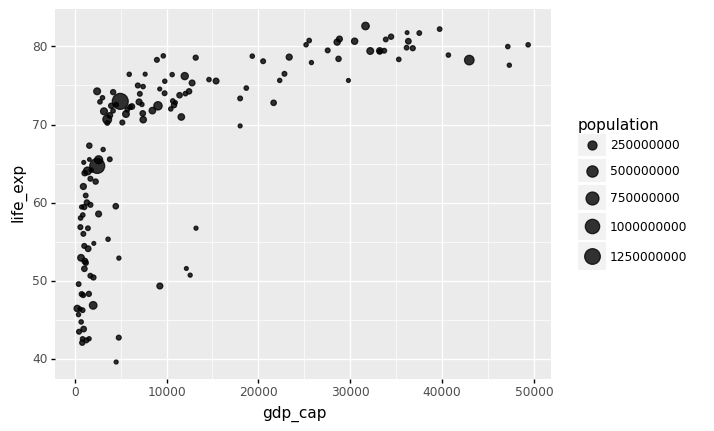

<ggplot: (314870913)>

In [38]:
#  In pandas query, you can reference variables using @:
# ref: https://stackoverflow.com/questions/57297077/use-variable-in-pandas-query

(
    ggplot(gapminder.query('year == @latest_year')) +
    aes(x = 'gdp_cap', y = 'life_exp', size = 'population') + 
    geom_point(alpha = 0.8)
)

### Faceting 

We could easily plot the data from 2007 in the same way we plotted the data from 1962. However, side by side plots are recommended for comparisons. 

**Faceting** variables in ggplot2 allows us to do this: we stratify the data by some variable and create the same plot for each strata.
We add a layer with the function facet grid to create faceting, which automatically separates the plots. This function allows you to facet by up to two variables, with one variable represented by columns and the other by rows. The function expects a space between the row and column variables. 

We can create a very simple grid with two facets (each subplot is a facet) as follows:

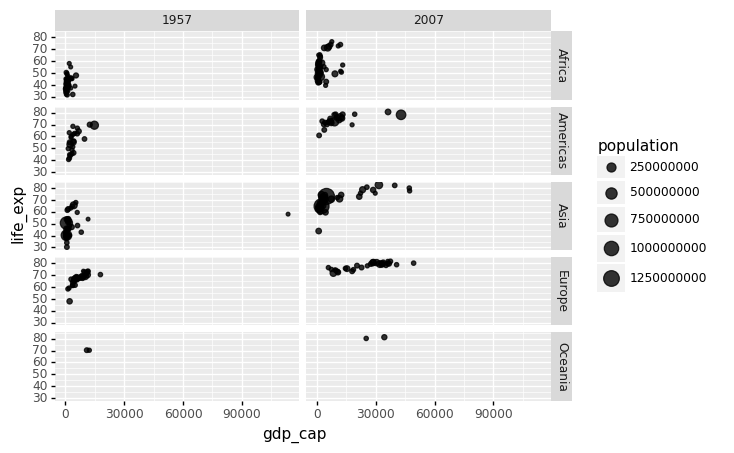

<ggplot: (312593245)>

In [39]:
(
    gapminder.
    query('year == @beginning_year or year == @latest_year').
    pipe(ggplot) +     
    aes(x = 'gdp_cap', y = 'life_exp', size = 'population') + 
    geom_point(alpha = 0.8) +
    facet_grid('continent~year')
)

Each continent/year pair has its own plot. However, this is merely an example and goes beyond what we are looking for, which is a simple comparison between 1957 and 2007. There is only one variable in this example, therefore we use `.` to tell `Facet` that we are not utilizing one of the variables:

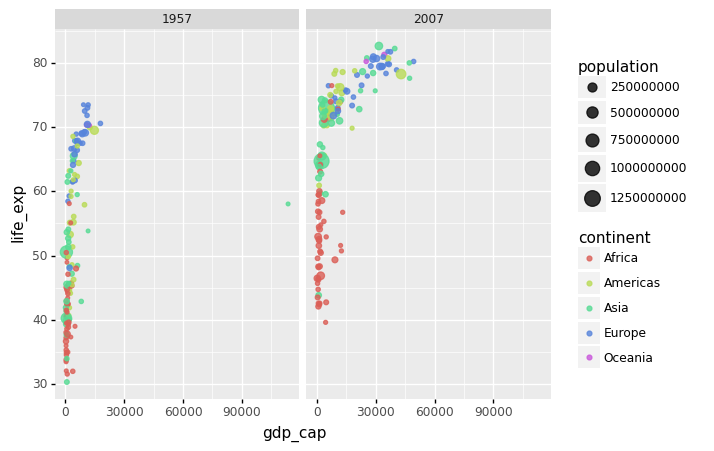

<ggplot: (314650981)>

In [40]:
(
    gapminder.
    query('year == @beginning_year or year == @latest_year').
    pipe(ggplot) +     
    aes(x = 'gdp_cap', y='life_exp', size='population', color='continent') + 
    geom_point(alpha = 0.8) +
    facet_grid('.~year')
)

Many countries have moved from the developing world cluster to the western world cluster, as shown in this graph.  This is especially evident when comparing Europe to Asia, which has some countries that have made significant progress.

In [41]:
gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

We can build a plot for multiple years to see how this transition occurred for over time. For instance, we can include the years 1957, 1967, 1977, 1987, 1997, 2007. If we do this, we will not want all the plots on the same row, which is `facet_grid`'s default behavior. We will want to create many rows and columns instead. This is made possible by the function `facet_wrap`, which wraps a series of plots so that each display has readable dimensions. 

The next two plots compare between using `facet_grid` and `facet_wap`.

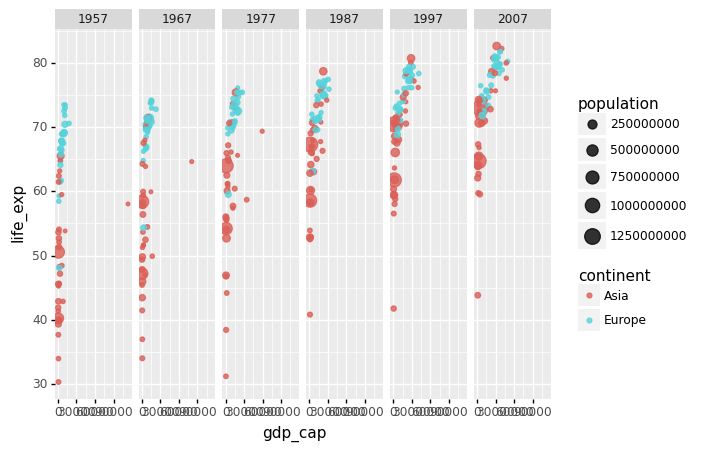

<ggplot: (312923501)>

In [42]:
#continent_selected = ['Asia','Europe']

#(
#    gapminder.
#    query('year in [1957, 1967, 1977, 1987, 1997, 2007] and continent in @continent_selected').
#    pipe(ggplot) +     
#    aes(x = 'gdp_cap', y='life_exp', size='population', color='continent') + 
#    geom_point(alpha = 0.8) +
#    facet_grid('.~year')
#)

# Notice that we use both single and double quotes.

(
    gapminder.
    query("year in [1957, 1967, 1977, 1987, 1997, 2007] and continent in ['Asia','Europe']").
    pipe(ggplot) +     
    aes(x = 'gdp_cap', y='life_exp', size='population', color='continent') + 
    geom_point(alpha = 0.8) +
    facet_grid('.~year')
)

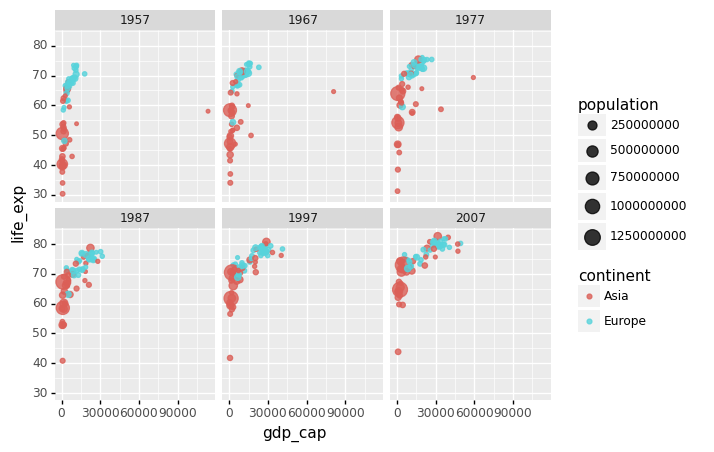

<ggplot: (314202637)>

In [43]:
# Notice that we use both single and double quotes.

# using Facet_wrap

(
    gapminder.
    query("year in [1957, 1967, 1977, 1987, 1997, 2007] and continent in ['Asia','Europe']").
    pipe(ggplot) +     
    aes(x = 'gdp_cap', y='life_exp', size='population', color='continent') + 
    geom_point(alpha = 0.8) +
    facet_wrap('year')
)

### Data transformations

In this section, we refer to the following note: Chapter 11 of the following lecture note: https://rafalab.github.io/dsbook/ 

We will now turn our attention to the question, **which concerns the common belief that global wealth distribution has gotten worse in recent decades**. When asked if poor countries have gotten poorer and rich ones have gotten richer, the majority of people say **yes**. 

We will be able to tell if this is the case by using stratification, histograms, smooth densities, and boxplots. 

To begin, we will look at **how transformations can occasionally aid in the building of more useful summaries and plots**.

In the gapminder dataset, the market value of goods and services generated by a country in a year is measured by GDP. The GDP per capita is frequently used to give an approximate idea of a country's wealth. The GDP figures have been adjusted for inflation, so they should be comparable across the years.

We **divide this number by 365** to get the more easily understandable metric of `dollars_per_day`. A person living in absolute poverty is defined as someone who survives on less than $2 a day in current dollars. This variable can be added to the Gapminder data frame using `pipe` and `assign` below.

Recall that the `assign` method adds new columns to a DataFrame and returns a new object (a duplicate) with the new columns combined with the original. Existing columns will be overwritten if they are re-assigned.

In [44]:
# Ref: https://stackoverflow.com/questions/44631279/assign-in-pandas-pipeline

gapminder.pipe(lambda x: x.assign(dollars_per_day = x.gdp_cap/365)).head()

,country,year,population,continent,life_exp,gdp_cap,dollars_per_day
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,2.135467
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,2.248912
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,2.337262
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,2.290951
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,2.027345


Here is a histogram of per day incomes from the 1957 data.

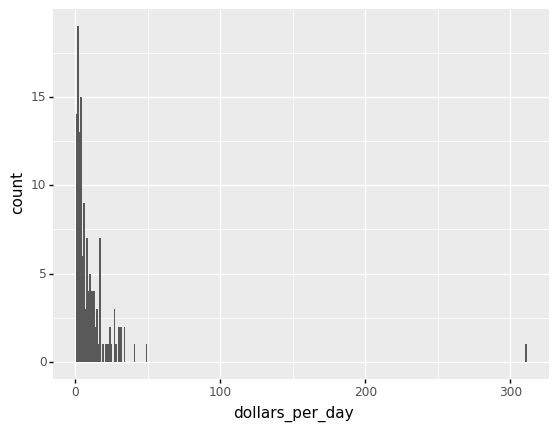

<ggplot: (312926869)>

In [45]:
from plotnine import *

beginning_year = 1957

(
    gapminder.pipe(lambda x: x.assign(dollars_per_day = x.gdp_cap/365)). 
    query('year == @beginning_year').
    pipe(ggplot) + 
    aes('dollars_per_day') +
    geom_histogram(binwidth = 1)
)

We set `xlim(0,50)` to remove an outlier.

You might want to investigate what's causing this outlier.

It is important to understand what causes them. Outliers can be caused by data entry/experiment measurement errors, sampling issues, or natural variation.

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 1 rows containing non-finite values.
/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


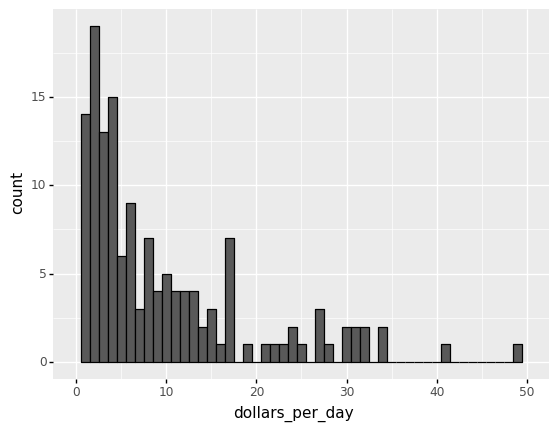

<ggplot: (314277509)>

In [46]:
# Adjusting the x-limit

(
    gapminder.pipe(lambda x: x.assign(dollars_per_day = x.gdp_cap/365)). 
    query('year == @beginning_year').
    pipe(ggplot) + 
    aes('dollars_per_day') +
    geom_histogram(binwidth = 1, color = 'black') +
    xlim(0,50)
)

In [47]:
#(
#    (gapminder.pipe(lambda x: x.assign(dollars_per_day = x.gdp_cap/365)). 
#    query('year == @beginning_year').sort_values(by = 'dollars_per_day', ascending=False)['dollars_per_day']>= 20).value_counts()
#)    

In [48]:
#(
#    gapminder.pipe(lambda x: x.assign(dollars_per_day = x.gdp_cap/365)). 
#    query('year == @beginning_year').isnull().value_counts()
#)

The majority of countries' average daily income are less than \\$20, as shown in the above figure. 

20 countries with averages above \\$20, on the other hand, take up the majority of the x-axis. As a result, the plot is not very useful for countries with daily values below \\$20.

It could be more useful to know how many countries have average daily incomes of 

* \\$1 (extremely poor), 
* \\$2 (very poor), 
* \\$4 (poor), 
* \\$8 (middle), 
* \\$16 (well off), 
* \\$32 (rich), 
* \\$64 (very rich) each day. 

2**2 -> 2**3
log2(2**2) = 2 -> log2(2**3) = 3

These changes are **multiplicative**, and log transformations turn multiplicative changes into **additive** ones: using base 2, a doubling of a value turns into an increase by 1 in the log base 2 scale.

#### Logging the values

If we use a log, we get the following distribution.

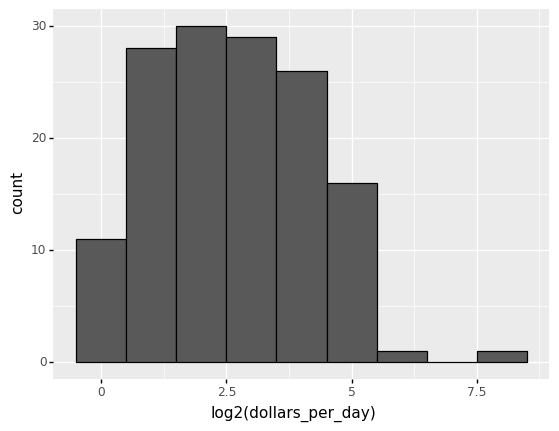

<ggplot: (312028493)>

In [49]:
#Taking log base 2 of dollars income per day
# The variable name should be log(dollars_per_day)

(
    gapminder.pipe(lambda x: x.assign(dollars_per_day = np.log2(x.gdp_cap/365))). 
    query('year == @beginning_year').
    pipe(ggplot) + 
    aes('dollars_per_day') +
    geom_histogram(binwidth = 1, color = 'black') +
    xlab('log2(dollars_per_day)')
)

#### Scaling the axis

The scale_x_continuous function can be used to scale the axis with logs. We use this layer instead of logging the values first.

In plots, we can utilize log transformations in two ways. Before graphing, we can log the values or use log scales in the axes. Both approaches have advantages and disadvantages. 

* We can more easily interpret **intermediate values in the scale** if we log the data.

* The benefit of using logged scales is that the **original values** are shown on the axes.

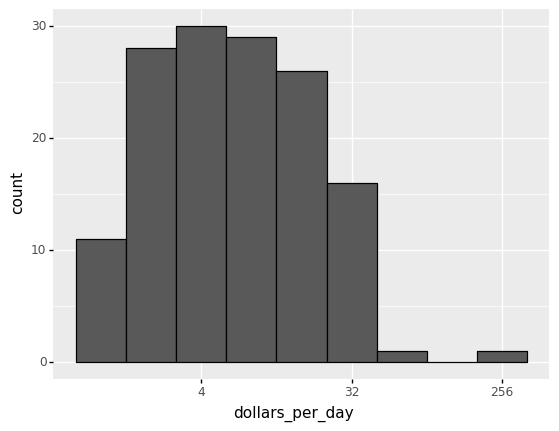

<ggplot: (312601081)>

In [50]:
(
    gapminder.pipe(lambda x: x.assign(dollars_per_day = x.gdp_cap/365)). 
    query('year == @beginning_year').
    pipe(ggplot) + 
    aes('dollars_per_day') +
    geom_histogram(binwidth = 1, color = 'black') +
    scale_x_continuous(trans = "log2")
)

Now let us apply `facet_wrap` to dig deeper into the variations of the histogram of incomes per day from 1952 to 2007.

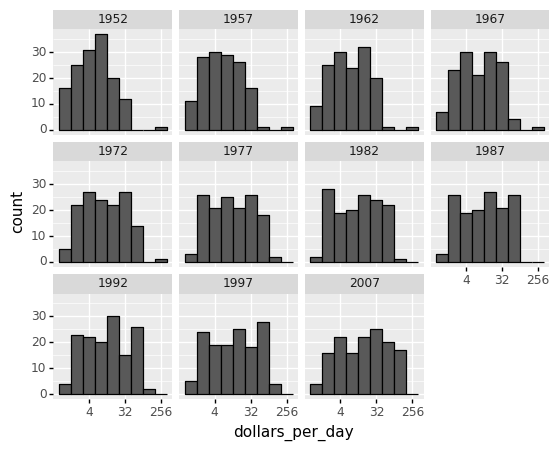

<ggplot: (311545613)>

In [51]:
(
    gapminder.pipe(lambda x: x.assign(dollars_per_day = x.gdp_cap/365)). 
    query('year  in [1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2007] ').
    pipe(ggplot) + 
    aes('dollars_per_day') +
    geom_histogram(binwidth = 1, color = 'black') +
    scale_x_continuous(trans = "log2") +
    facet_wrap('year')
)

From the figures above, the histogram in the 1967 income distribution values revealed a dichotomy (two groups). However, the histogram does not indicate whether the two groups of countries are developed and developing.

In what follows, we will read another CSV file, namely gapminder_dslab, which contains information about the regional classification. Then we will merge this regional classification into our original Gapminder dataset.

In [52]:
past_year = 1967

## Adding regional classfication into Gapminder dataset

In addition to the variable `continent` variable in the Gapminder dataset, we will preprocess our data by adding another variable, region, which gives a classification of countries by region.

In [53]:
gapminder_dslab = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/gapminder_dslab.csv')


# url = 'https://raw.githubusercontent.com/pairote-sat/SCMA248/main/Data/gapminder_dslab.csv'
# gapminder_dslab = pd.read_csv(url)

We can check that countries are classified into 22 different regions as follows:

In [54]:
region = gapminder_dslab.query('year== 2007')[['country','region']]
region['region'].unique()

array(['Southern Europe', 'Northern Africa', 'Middle Africa', 'Caribbean',
       'South America', 'Western Asia', 'Australia and New Zealand',
       'Western Europe', 'Southern Asia', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Polynesia',
       'Central Asia', 'Micronesia'], dtype=object)

In [55]:
print(region.head()) #dslab
gapminder.head()

                  country           region
8695              Albania  Southern Europe
8696              Algeria  Northern Africa
8697               Angola    Middle Africa
8698  Antigua and Barbuda        Caribbean
8699            Argentina    South America


,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


merge() is most useful when you want to combine rows that share data (in our case `country` also known as **key column**). 

See https://realpython.com/pandas-merge-join-and-concat/ for more detail.

In [56]:
gapminder = pd.merge(gapminder,region, how='left',on='country')

Next, let us begin by looking at the data by region.

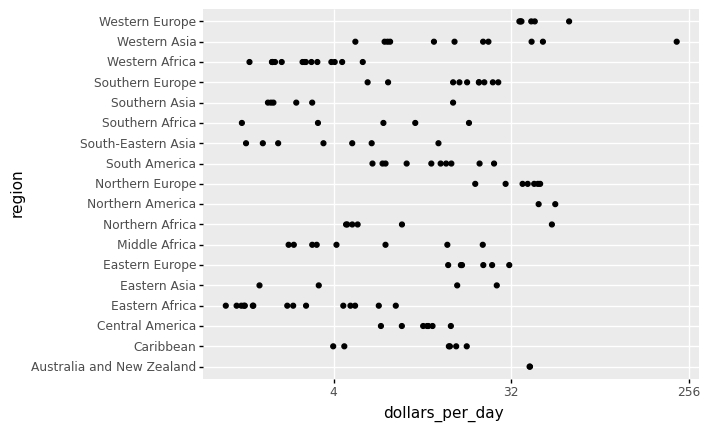

<ggplot: (311986217)>

In [57]:
# note that past_year = 1967

(
    gapminder.pipe(lambda x: x.assign(dollars_per_day = x.gdp_cap/365)). 
    query('year == @past_year').dropna().
    pipe(ggplot) +
    aes('dollars_per_day','region') +
    geom_point() +
    scale_x_continuous(trans='log2') 
)

By default, the discrete values along axis are ordered alphabetically. 

To get more information from the plot above, we will **reorder the regions by the median value** (from low to high or vice versa). If we want a specific ordering we use a `pandas.Categorical` variable with categories ordered to our preference defined by keyword `categories`. 

(see the links below for more detail https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-order-plot-series.html 

https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

**Notes**  

1. Categoricals are a data type in Pandas that represents statistical categorical variables. Gender, social status, blood type, country affiliation, observation time, and Likert scale ratings are some examples.

2. Categorical data values are either in categories or np.nan. Order is defined by the order of `categories`, not lexical order of the values.


To enhance data visualization, we begin by creating a new data frame which is the filtered dataset of Gapminder, namely **gapminder1967**.

In [58]:
gapminder1967 = gapminder.pipe(lambda x: x.assign(dollars_per_day = x.gdp_cap/365)).query('year == @past_year').dropna()

In [59]:
gapminder1967.head()

,country,year,population,continent,life_exp,gdp_cap,region,dollars_per_day
15,Albania,1967,1984060,Europe,66.220,2760.196931,Southern Europe,7.562183
27,Algeria,1967,12760499,Africa,51.407,3246.991771,Northern Africa,8.895868
39,Angola,1967,5247469,Africa,35.985,5522.776375,Middle Africa,15.130894
51,Argentina,1967,22934225,Americas,65.634,8052.953021,South America,22.062885
63,Australia,1967,11872264,Oceania,71.100,14526.124650,Australia and New Zealand,39.797602


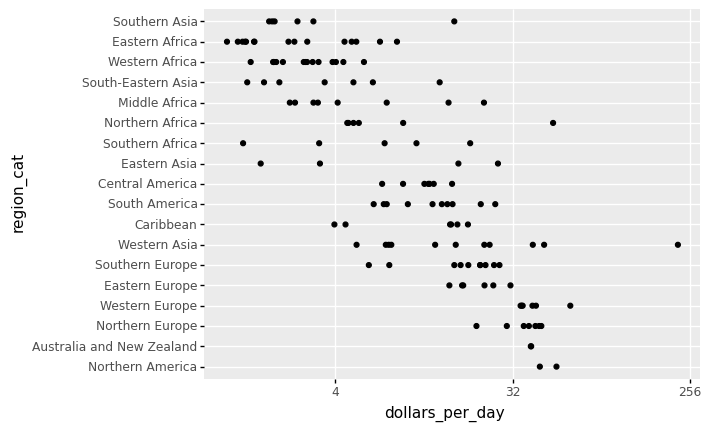

<ggplot: (311707625)>

In [60]:
# reorder the regions by the median value
region_list = gapminder1967.groupby('region').median().sort_values(by = ['dollars_per_day'], ascending = False).index.tolist()

# categories=region_list defines the order of Categoricals
region_cat = pd.Categorical(gapminder1967['region'], categories=region_list)

# assign to a new column in the DataFrame
gapminder1967 = gapminder1967.assign(region_cat = region_cat)

(
    gapminder1967.
    pipe(ggplot) +
    aes('dollars_per_day','region_cat') +
    geom_point() +
    scale_x_continuous(trans='log2') 
)

Based on the sorted median values of incomes per day, we clearly see that there is a "west vs the rest" dichotomy: there are two distinct groups, 

* the rich group consisting of North America, Northern and Western Europe, New Zealand, and Australia, and 
* the poor group consisting of the rest of the world. 

In what follows, we form five different groups as based on our observations:

In [61]:
region_cat

['Southern Europe', 'Northern Africa', 'Middle Africa', 'South America', 'Australia and New Zealand', ..., 'South America', 'South-Eastern Asia', 'Western Asia', 'Eastern Africa', 'Eastern Africa']
Length: 133
Categories (18, object): ['Northern America', 'Australia and New Zealand', 'Northern Europe', 'Western Europe', ..., 'South-Eastern Asia', 'Western Africa', 'Eastern Africa', 'Southern Asia']

In [62]:
gapminder1967

,country,year,population,continent,life_exp,gdp_cap,region,dollars_per_day,region_cat
15,Albania,1967,1984060,Europe,66.220,2760.196931,Southern Europe,7.562183,Southern Europe
27,Algeria,1967,12760499,Africa,51.407,3246.991771,Northern Africa,8.895868,Northern Africa
39,Angola,1967,5247469,Africa,35.985,5522.776375,Middle Africa,15.130894,Middle Africa
51,Argentina,1967,22934225,Americas,65.634,8052.953021,South America,22.062885,South America
63,Australia,1967,11872264,Oceania,71.100,14526.124650,Australia and New Zealand,39.797602,Australia and New Zealand
...,...,...,...,...,...,...,...,...,...
1635,Venezuela,1967,9709552,Americas,63.479,9541.474188,South America,26.141025,South America
1647,Vietnam,1967,39463910,Asia,47.838,637.123289,South-Eastern Asia,1.745543,South-Eastern Asia
1659,West Bank and Gaza,1967,1142636,Asia,51.631,2649.715007,Western Asia,7.259493,Western Asia
1683,Zambia,1967,3900000,Africa,47.768,1777.077318,Eastern Africa,4.868705,Eastern Africa


In [63]:
gapminder1967.region.isin(["Western Europe", "Northern Europe","Southern Europe", "Northern America",
"Australia and New Zealand"])

15       True
27      False
39      False
51      False
63       True
        ...  
1635    False
1647    False
1659    False
1683    False
1695    False
Name: region, Length: 133, dtype: bool

Exercise:

1. Append the column called `group` that groups countries into 5 different groups as follows:

* West: ["Western Europe", "Northern Europe","Southern Europe", "Northern America",
"Australia and New Zealand"]

* East Asia: ["Eastern Asia", "South-Eastern Asia"]

* Latin America: ["Caribbean", "Central America",
"South America"]

* Sub-Saharan: [continent == "Africa"] &
[region != "Northern Africa"]

* Other: All remaining countries (also including NAN). 

2. We now want to compare the distribution across these five groups to confirm the “west versus the rest” dichotomy. We could generate five histograms or five density plots, but it may be more practical to have all the visual summaries in one plot. Write Python code to stack boxplots next to each other.

2. We now want to compare the distribution across these five groups to confirm the “west versus the rest” dichotomy. To do this, we will work with the 1967 data. We could generate five histograms or five smooth density plots, but it may be more practical to have all the visual summaries **in one plot**. Write Python code to stack smooth density plots (or histograms) vertically (with slightly overlapping lines) that share the same x-axis.

The Numpy `select` function is more powerful for creating a new column based on some conditions on the other columns. It can be used to specify a set of conditions and values. As a result, each condition can be assigned a specific value.

See 
https://towardsdatascience.com/3-methods-to-create-conditional-columns-with-python-pandas-and-numpy-a6cd4be9da53 and
https://towardsdatascience.com/create-new-column-based-on-other-columns-pandas-5586d87de73d

In [64]:
gapminder.query("year==2007 & continent == 'Africa'").filter(items=['country','continent','region']).head()

,country,continent,region
35,Algeria,Africa,Northern Africa
47,Angola,Africa,Middle Africa
131,Benin,Africa,Western Africa
167,Botswana,Africa,Southern Africa
203,Burkina Faso,Africa,Western Africa


Let's start by defining the conditions and their values.

In [65]:
# https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

conditions = [
    gapminder1967.region.isin(["Western Europe", "Northern Europe","Southern Europe", "Northern America",
"Australia and New Zealand"]),
    gapminder1967.region.isin(["Eastern Asia", "South-Eastern Asia"]),
    gapminder1967.region.isin(["Caribbean", "Central America",
"South America"] ),
    (gapminder1967.continent.isin(["Africa"])) & (~gapminder1967.region.isin(["Northern Africa"] ))
]

values = ['West','East Asia','Latin America','Sub-Saharan']

np.select(conditions,values, default="Others")


array(['West', 'Others', 'Sub-Saharan', 'Latin America', 'West', 'West',
       'Others', 'Others', 'West', 'Sub-Saharan', 'Latin America', 'West',
       'Sub-Saharan', 'Latin America', 'Others', 'Sub-Saharan',
       'Sub-Saharan', 'East Asia', 'Sub-Saharan', 'West', 'Sub-Saharan',
       'Sub-Saharan', 'Latin America', 'East Asia', 'Latin America',
       'Sub-Saharan', 'Sub-Saharan', 'Sub-Saharan', 'Latin America',
       'Sub-Saharan', 'West', 'Latin America', 'Others', 'West',
       'Sub-Saharan', 'Latin America', 'Latin America', 'Others',
       'Latin America', 'Sub-Saharan', 'Sub-Saharan', 'Sub-Saharan',
       'West', 'West', 'Sub-Saharan', 'Sub-Saharan', 'West',
       'Sub-Saharan', 'West', 'Latin America', 'Sub-Saharan',
       'Sub-Saharan', 'Latin America', 'Latin America', 'East Asia',
       'Others', 'West', 'Others', 'East Asia', 'Others', 'Others',
       'West', 'Others', 'West', 'Latin America', 'East Asia', 'Others',
       'Sub-Saharan', 'Others', 'Others', 'S

In [66]:
gapminder1967['group']=np.select(conditions,values, default="Others")

gapminder1967.head()

,country,year,population,continent,life_exp,gdp_cap,region,dollars_per_day,region_cat,group
15,Albania,1967,1984060,Europe,66.220,2760.196931,Southern Europe,7.562183,Southern Europe,West
27,Algeria,1967,12760499,Africa,51.407,3246.991771,Northern Africa,8.895868,Northern Africa,Others
39,Angola,1967,5247469,Africa,35.985,5522.776375,Middle Africa,15.130894,Middle Africa,Sub-Saharan
51,Argentina,1967,22934225,Americas,65.634,8052.953021,South America,22.062885,South America,Latin America
63,Australia,1967,11872264,Oceania,71.100,14526.124650,Australia and New Zealand,39.797602,Australia and New Zealand,West


We turn this group variable into a factor to control the order of the levels.

In [67]:
group_list = ["Others", "Latin America","East Asia", "Sub-Saharan", "West"]

gapminder1967['group'] = pd.Categorical(gapminder1967['group'], categories=group_list)

Two characteristics of the average income distribution in 1967 were identified by the exploratory data analysis above. We discovered a **bimodal distribution** using a histogram, with the modes corresponding to poor and rich countries. 

To confirm the "west vs the rest" dichotomy, we will compare the distribution across these five groups. A summary plot may be beneficial because the number of points in each category is large enough. 

We could make five histograms or density plots, but having all of the visual summaries in one figure may be more practical. As a result, we begin by stacking boxplots adjacent to one another.

**Note** A **boxplot** is a standard method of displaying a dataset based on a five-number summary: minimum, maximum, sample median, first and third quartiles.

In addition to the lowest and maximum values required to create a box-plot, the interquartile range (IQR), as shown in the plot, is another essential feature that can be used to create a box-plot.

As seen from the plot, a box plot normally consists of two parts: a box and a pair of whiskers. The lowest point on the box-plot (i.e. the lower whisker's boundary) represents the data set's minimum value, while the highest point (i.e. the upper whisker's boundary) represents the data set's maximum value (excluding any **outliers**). A horizontal line is drawn in the middle of the box to signify the median, which drawn from Q1 to Q3.

The whisker limits are found inside the 1.5 IQR value. Outliers are all other observed data points that are outside the whisker's boundary.

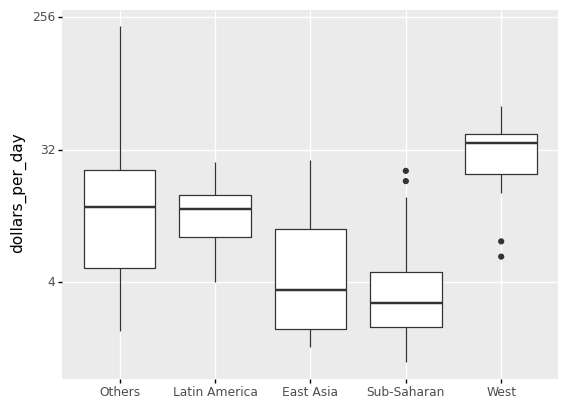

<ggplot: (311822765)>

In [68]:
(
    ggplot(gapminder1967) + 
    aes('group','dollars_per_day') +
    geom_boxplot() +
    scale_y_continuous(trans='log2') +
    xlab('')
)

In [69]:
#gapminder1967.query('region == polynesia')
gapminder1967.region.head()

15              Southern Europe
27              Northern Africa
39                Middle Africa
51                South America
63    Australia and New Zealand
Name: region, dtype: object

The shortcoming of boxplots is that by summarizing the data into five numbers, we may miss important data properties. Showing the data is one approach to avoid this.

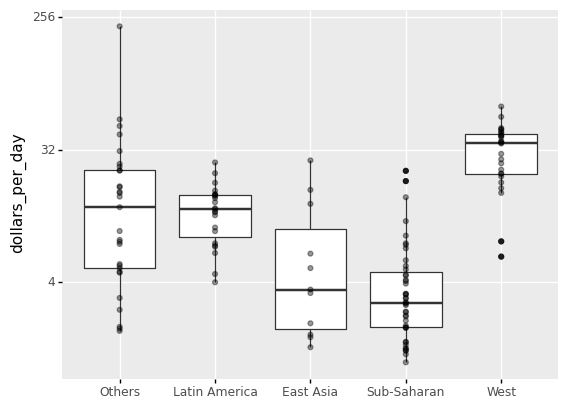

<ggplot: (311707437)>

In [70]:
(
    ggplot(gapminder1967) + 
    aes('group','dollars_per_day') +
    geom_boxplot() +
    scale_y_continuous(trans='log2') +
    xlab('') +
    geom_point(alpha=0.4)
)

In [71]:
len(gapminder1967.region.unique())

18

If we are concerned that the boxplot summary is too basic, we can present smooth densities or histograms with `facet_wrap`.


**Note** if you are working with R programming, the library **ggridges** (together with ggplot) can be used to visualize distributions of several groups of a category. This allows us to stack smooth densities or histograms vetically. We refer to the stacked plot as **ridge plots**. See for an example 
https://cran.r-project.org/web/packages/ggridges/vignettes/gallery.html and
https://www.analyticsvidhya.com/blog/2021/06/ridgeline-plots-visualize-data-with-a-joy/#:~:text=Ridgeline%20Plot%20or%20Joy%20Plot,beautiful%20piece%20of%20the%20plot.


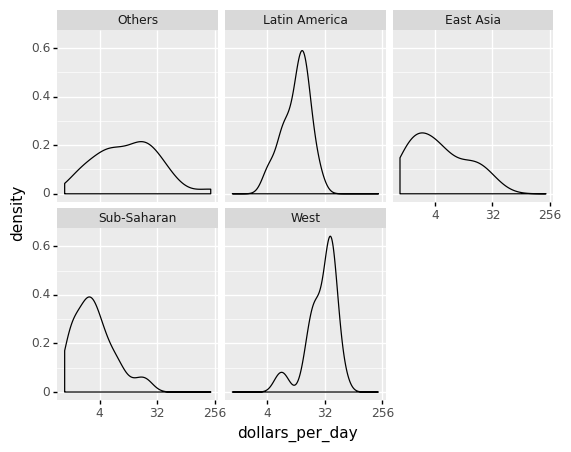

<ggplot: (313847509)>

In [72]:
(
    ggplot(gapminder1967) + aes('dollars_per_day') + 
    geom_density() +
    facet_wrap('group') +
    scale_x_continuous(trans='log2') 
)    

#### In Python, plot a ridgeline plot.

In Python, a Ridgeline Plot can be created using a variety of tools, including the popular Matplotlib and Plotly libraries. However, plotting a Ridgeline Plot with joypy is rather simple. Here is an example to the Gapminder dataset. 

See the following for more detail: https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052

In [73]:
!pip install joypy

In [74]:
from joypy import joyplot
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'dollars_per_day')

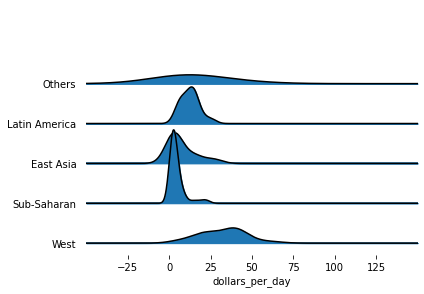

In [75]:
joyplot(gapminder1967, by='group', column='dollars_per_day', x_range=[-50,150])
plt.xlabel('dollars_per_day')